# **Taylor Swift Songs analysis**

In [1]:
import pandas as pd
import numpy as np
import random

# Models
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import ElasticNet
import xgboost as xg
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance

# Data Vis
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis**

In [2]:
# Load Dataset
df = pd.read_csv('taylor_swift_spotify.csv', sep=',')
df.drop('Unnamed: 0', axis=1, inplace=True)
#  Convert date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801
3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,82,261228
4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,80,262974


In [3]:
# Data Info
print("Dataframe Info:")
df.info()

# Missing values
print("\nMissing values:")
print(df.isnull().sum())

# Description
print("\nData Description:")
df.describe()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              582 non-null    object        
 1   album             582 non-null    object        
 2   release_date      582 non-null    datetime64[ns]
 3   track_number      582 non-null    int64         
 4   id                582 non-null    object        
 5   uri               582 non-null    object        
 6   acousticness      582 non-null    float64       
 7   danceability      582 non-null    float64       
 8   energy            582 non-null    float64       
 9   instrumentalness  582 non-null    float64       
 10  liveness          582 non-null    float64       
 11  loudness          582 non-null    float64       
 12  speechiness       582 non-null    float64       
 13  tempo             582 non-null    float64       
 14  valence   

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,582,582.00000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,2018-04-17 22:43:17.938144256,11.42268,0.333185,0.580804,0.565832,0.003393,0.161130,-7.661986,0.056475,122.398954,0.391000,57.857388,240011.189003
min,2006-10-24 00:00:00,1.00000,0.000182,0.175000,0.118000,0.000000,0.033500,-17.932000,0.023100,68.097000,0.038400,0.000000,83253.000000
25%,2012-10-22 00:00:00,5.00000,0.037325,0.515000,0.418000,0.000000,0.096525,-9.400750,0.030300,96.888000,0.230000,45.000000,211823.000000
50%,2020-08-18 00:00:00,10.00000,0.184500,0.593500,0.571000,0.000002,0.114500,-7.352500,0.037600,119.054500,0.374000,62.000000,235433.000000
75%,2022-10-22 00:00:00,15.00000,0.660000,0.653000,0.719000,0.000058,0.161000,-5.494750,0.054800,143.937250,0.522500,70.000000,260819.500000
max,2024-04-19 00:00:00,46.00000,0.971000,0.897000,0.948000,0.333000,0.931000,-1.927000,0.912000,208.918000,0.943000,93.000000,613026.000000
std,NaN,8.04206,0.327171,0.114553,0.191102,0.027821,0.136563,2.904653,0.070859,30.408485,0.195829,16.152520,45928.954305


In [4]:
# Float and Int columns
numeric_df = df.select_dtypes(include=['number'])


**Evolution Over Time**

In [5]:
# Song release over Time
df["year"] = df["release_date"].dt.year
fig=px.area(df.groupby('year',as_index=False).count().sort_values(by='name',ascending=False).sort_values(by='year'),x='year',y='name',markers=True,labels={'name':'Total songs'},color_discrete_sequence=['green'],title='<b>Year by Year Songs collection')
fig.update_layout(hovermode='x',title_x=0.5)


***Significant fluctuation in the number of songs released over time with peaks in 2017, 2020 and 2023***

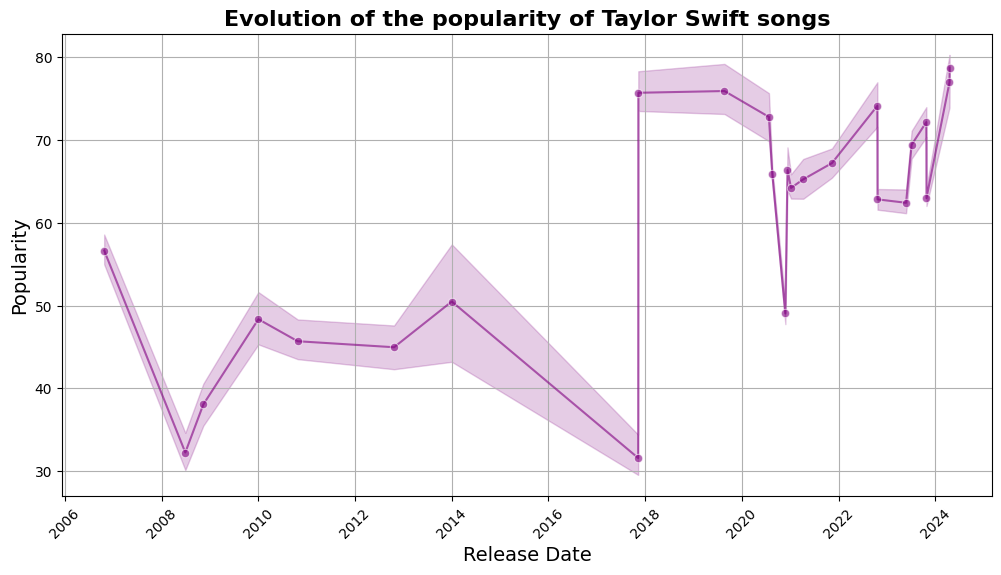

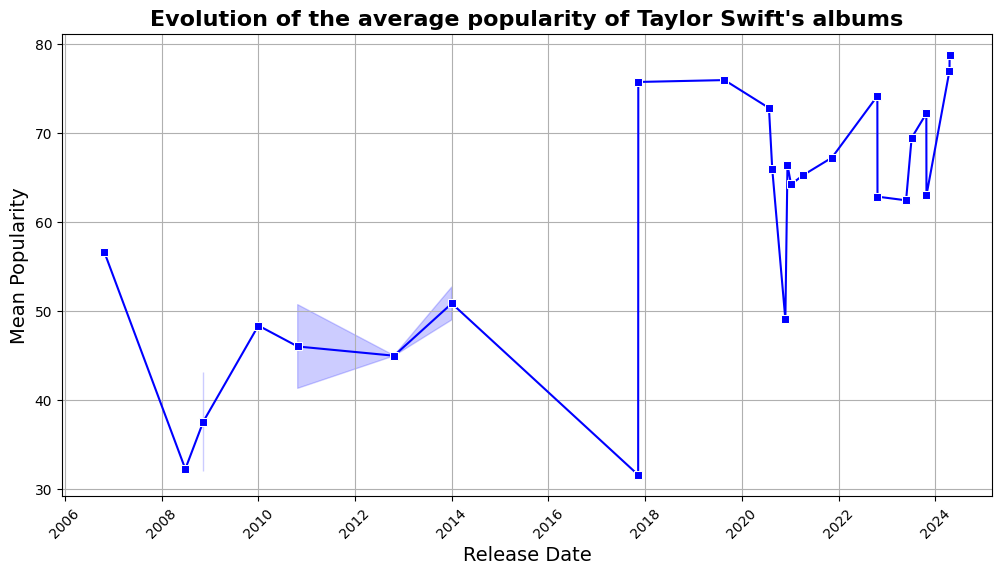

In [6]:
#  Sort songs by release date
df = df.sort_values(by='release_date')

#  Evolution of song popularity over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_date', y='popularity', marker='o', color='purple', alpha=0.6)
plt.title("Evolution of the popularity of Taylor Swift songs", fontsize=16, fontweight='bold')
plt.xlabel("Release Date", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#  Average popularity of albums by release date
album_popularity = df.groupby('album').agg({'popularity': 'mean', 'release_date': 'first'}).sort_values(by='release_date')

plt.figure(figsize=(12, 6))
sns.lineplot(data=album_popularity, x='release_date', y='popularity', marker='s', color='blue')
plt.title("Evolution of the average popularity of Taylor Swift's albums", fontsize=16, fontweight='bold')
plt.xlabel("Release Date", fontsize=14)
plt.ylabel("Mean Popularity", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




- ***2017–2018 marks a strong spike in popularity, corresponding to the release of *Reputation* (2017), an era marked by a stylistic shift and intense media attention.***
- ***A slight dip can be seen in 2020–2021, which may relate to the COVID-19 pandemic and the release of more introspective albums like *Folklore* and *Evermore*.***
- ***Popularity rises again from 2022 onward, possibly reflecting the success of Taylor Swift’s re-recorded albums (*Taylor’s Version*) and the anticipation around her upcoming releases.***


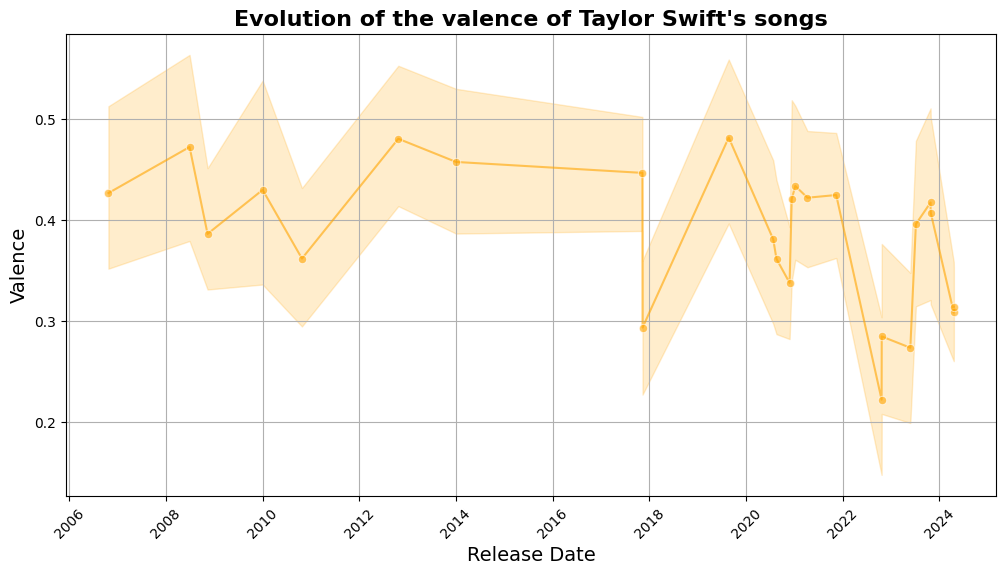

In [7]:
# Plot valence over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_date', y='valence', marker='o', color='orange', alpha=0.6)
plt.title("Evolution of the valence of Taylor Swift's songs", fontsize=16, fontweight='bold')
plt.xlabel("Release Date", fontsize=14)
plt.ylabel("Valence", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Top 10 Songs**

The 10 most popular songs :
                                name  \
324                     Cruel Summer   
31     Fortnight (feat. Post Malone)   
43   I Can Do It With a Broken Heart   
325                            Lover   
344                   Don’t Blame Me   
157                        Anti-Hero   
314                           august   
308                         cardigan   
0      Fortnight (feat. Post Malone)   
39                    Guilty as Sin?   

                                            album release_date  popularity  
324                                         Lover   2019-08-23          93  
31                  THE TORTURED POETS DEPARTMENT   2024-04-18          91  
43                  THE TORTURED POETS DEPARTMENT   2024-04-18          88  
325                                         Lover   2019-08-23          86  
344                                    reputation   2017-11-10          85  
157                                     Midnights   2022-10-21       

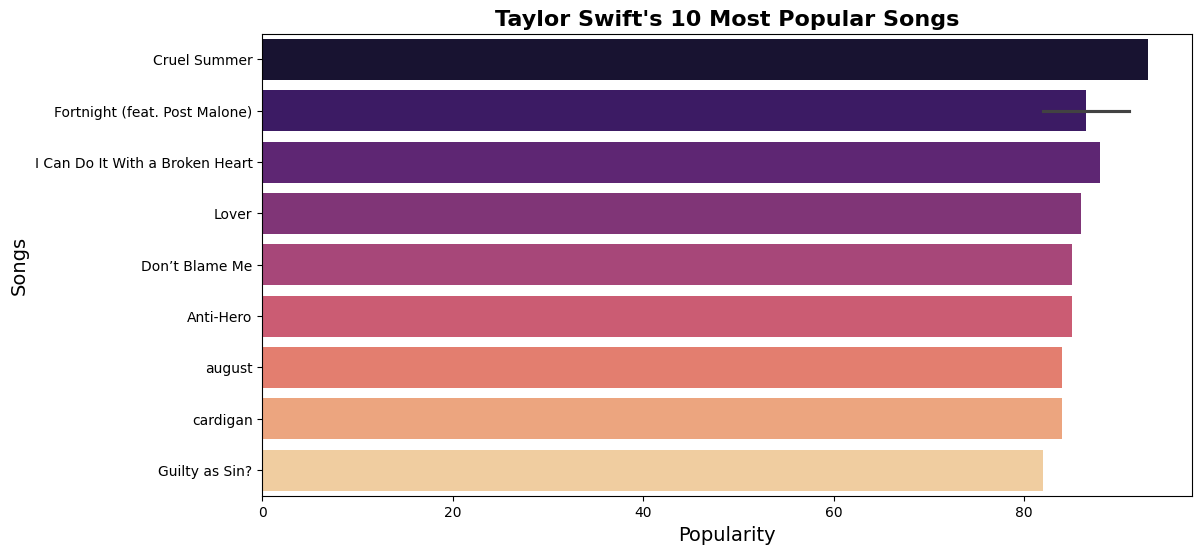

In [8]:
# Detection of popularity peaks (most popular songs)
top_songs = df.sort_values(by="popularity", ascending=False).head(10)
print("The 10 most popular songs :")
print(top_songs[['name', 'album', 'release_date', 'popularity']])

# Displaying popularity peaks
plt.figure(figsize=(12, 6))
sns.barplot(data=top_songs, y='name', x='popularity', hue='name', palette='magma')
plt.title("Taylor Swift's 10 Most Popular Songs", fontsize=16, fontweight='bold')
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Songs", fontsize=14)
plt.show()


**Top 10 Albums**

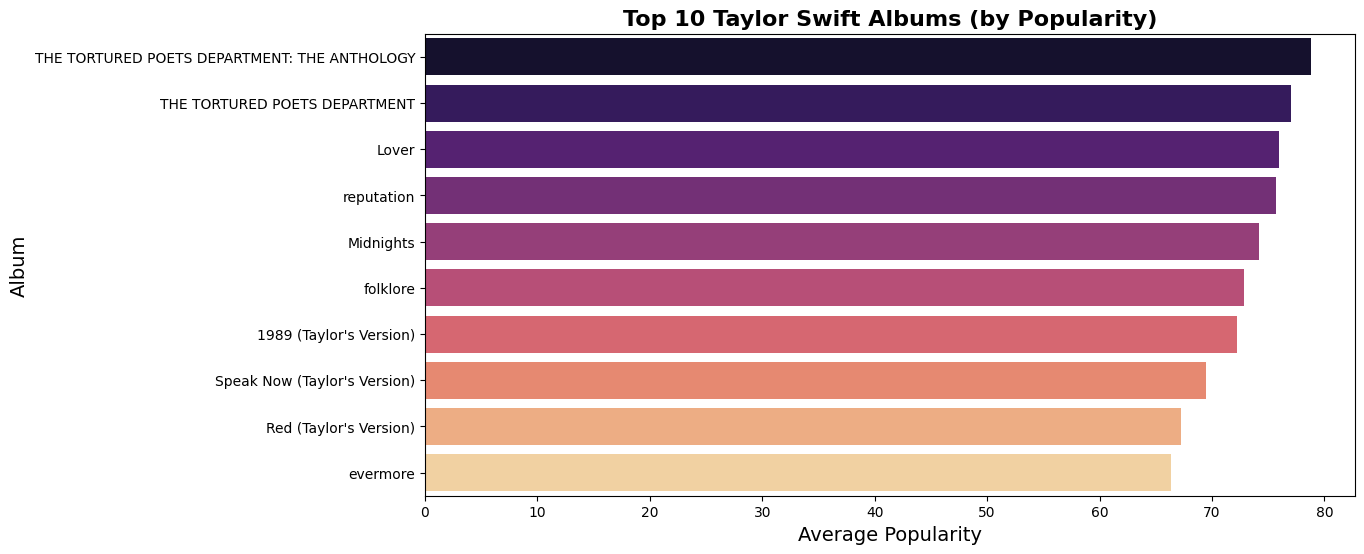

In [9]:
# Top Most Popular Albums
top_albums = df.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)

# Reverse the order of the DataFrame
top_albums = top_albums.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_albums, y='album', x='popularity', hue='album', palette='magma')
plt.title('Top 10 Taylor Swift Albums (by Popularity)', fontsize=16, fontweight='bold')
plt.xlabel('Average Popularity', fontsize=14)
plt.ylabel('Album', fontsize=14)
plt.show()

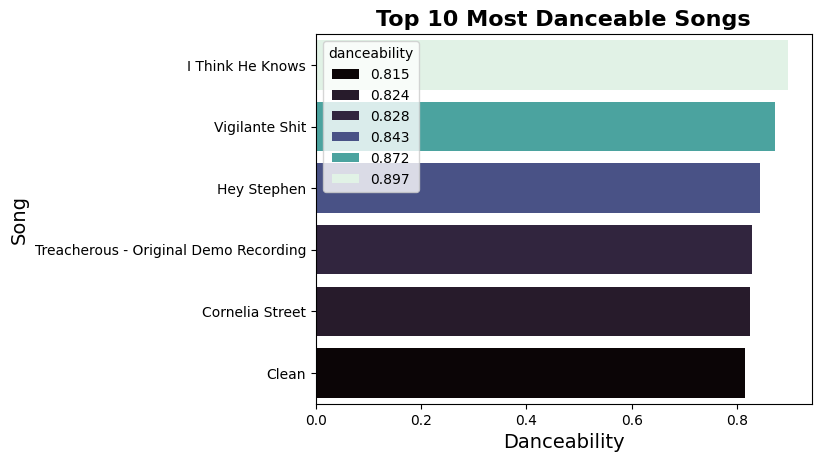

In [10]:
# Most danceable songs
top_dance = df.sort_values(by='danceability', ascending=False).head(10)
sns.barplot(data=top_dance, x='danceability', y='name', hue='danceability', palette='mako')
plt.title("Top 10 Most Danceable Songs", fontsize=16, fontweight='bold')
plt.xlabel("Danceability", fontsize=14)
plt.ylabel("Song", fontsize=14)
plt.show()

**Duration**

Songs length
                                            name  duration_ms  \
581         Teardrops on My Guitar - Pop Version       179066   
567                                   Tim McGraw       232106   
568                              Picture To Burn       173066   
569  Teardrops On My Guitar - Radio Single Remix       203040   
570                        A Place in this World       199200   

    duration_category  
581             short  
567             short  
568             short  
569             short  
570             short  


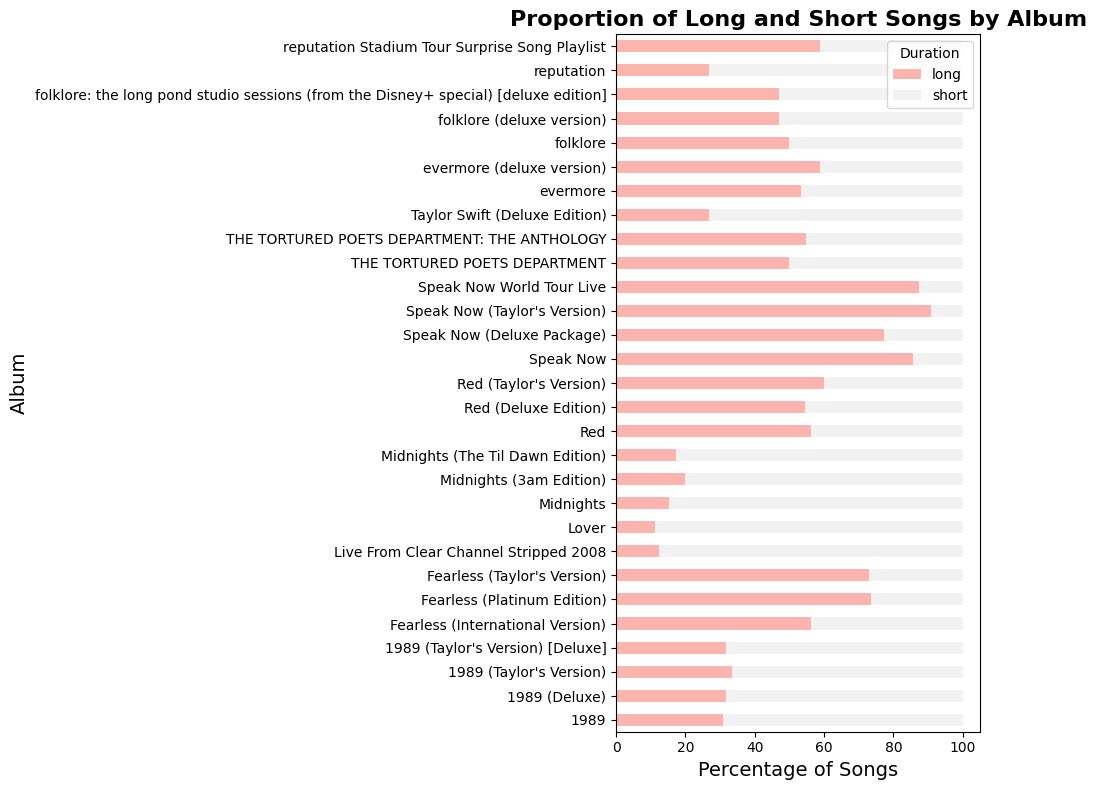

In [11]:
# Create a new column that categorizes songs into "long" and "short"
# We will define a song as "long" if its duration is greater than the median

duration_median = df['duration_ms'].median()
df['duration_category'] = ['long' if x > duration_median else 'short' for x in df['duration_ms']]

# Check categories
print("Songs length")
print(df[['name', 'duration_ms', 'duration_category']].head())

# Percentage of long vs short songs per album
album_duration = df.groupby(['album', 'duration_category']).size().unstack(fill_value=0)
album_duration_percent = album_duration.div(album_duration.sum(axis=1), axis=0) * 100

# Stacked bar plot
album_duration_percent.plot(kind='barh', stacked=True, colormap='Pastel1', figsize=(10, 8))
plt.title("Proportion of Long and Short Songs by Album", fontsize=16, fontweight='bold')
plt.xlabel("Percentage of Songs", fontsize=14)
plt.ylabel("Album", fontsize=14)
plt.legend(title="Duration")
plt.tight_layout()
plt.show()


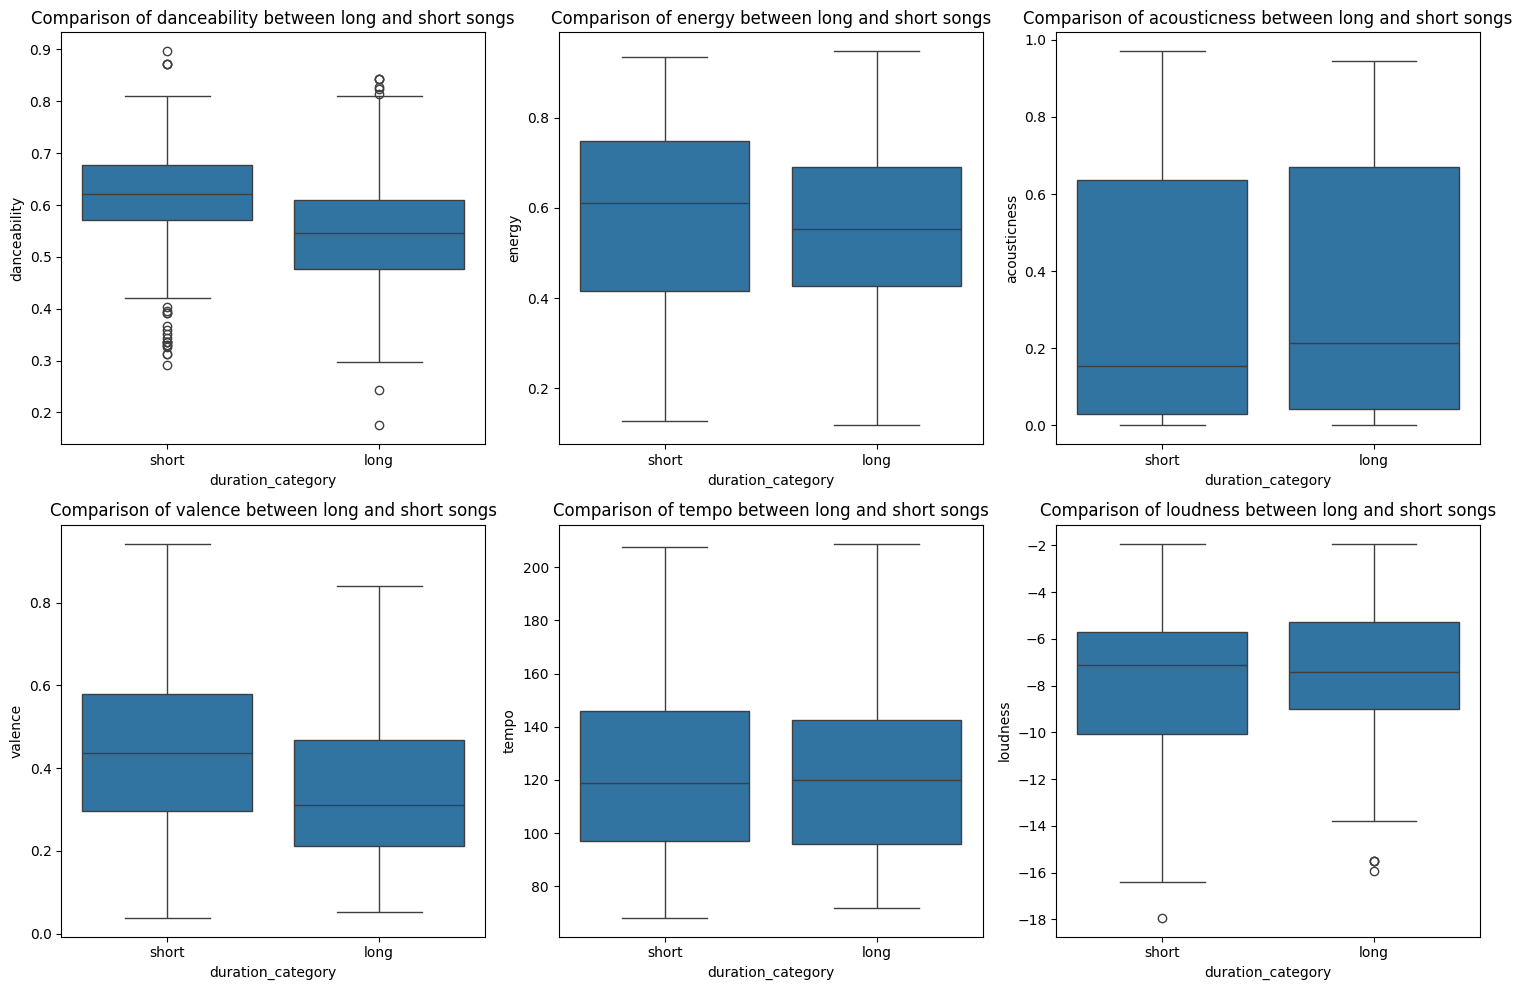

In [12]:
# Comparison of feature distributions for long and short songs
features = ['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'loudness']

# Visualization of feature distributions for long and short songs
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='duration_category', y=feature, data=df)
    plt.title(f'Comparison of {feature} between long and short songs')

plt.tight_layout()
plt.show()



***Short songs tend to have slightly higher values in danceability, energy, valence, and loudness, suggesting they are generally more upbeat, lively, and emotionally positive.***


**Feature Correlation Matrix**

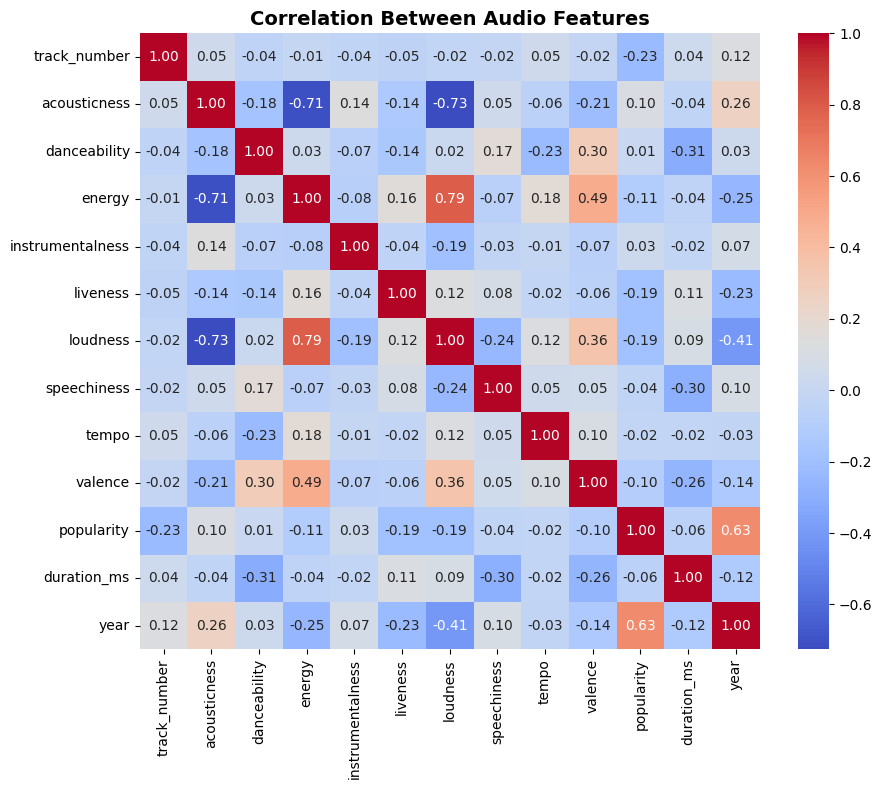

In [13]:
# Audio features Correlation Matrix
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Audio Features", fontsize=14, fontweight='bold')
plt.show()


***The heatmap shows strong positive correlations between energy and loudness, valence and danceability, and also valence and energy, suggesting that more energetic songs tend to be louder and more positive, while more danceable tracks are also perceived as more emotionally uplifting.***

Average musical characteristics for the 10 albums :
                                                    danceability    energy  \
album                                                                        
1989 (Taylor's Version) [Deluxe]                        0.626500  0.661182   
Fearless (Taylor's Version)                             0.551038  0.639115   
Midnights (The Til Dawn Edition)                        0.624348  0.472261   
Red (Deluxe Edition)                                    0.633409  0.600773   
Red (Taylor's Version)                                  0.576967  0.586900   
Speak Now (Deluxe Package)                              0.559000  0.659409   
Speak Now (Taylor's Version)                            0.555636  0.658273   
THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY            0.532419  0.457290   
folklore: the long pond studio sessions (from t...      0.551441  0.373412   
reputation Stadium Tour Surprise Song Playlist          0.593130  0.653457   

           

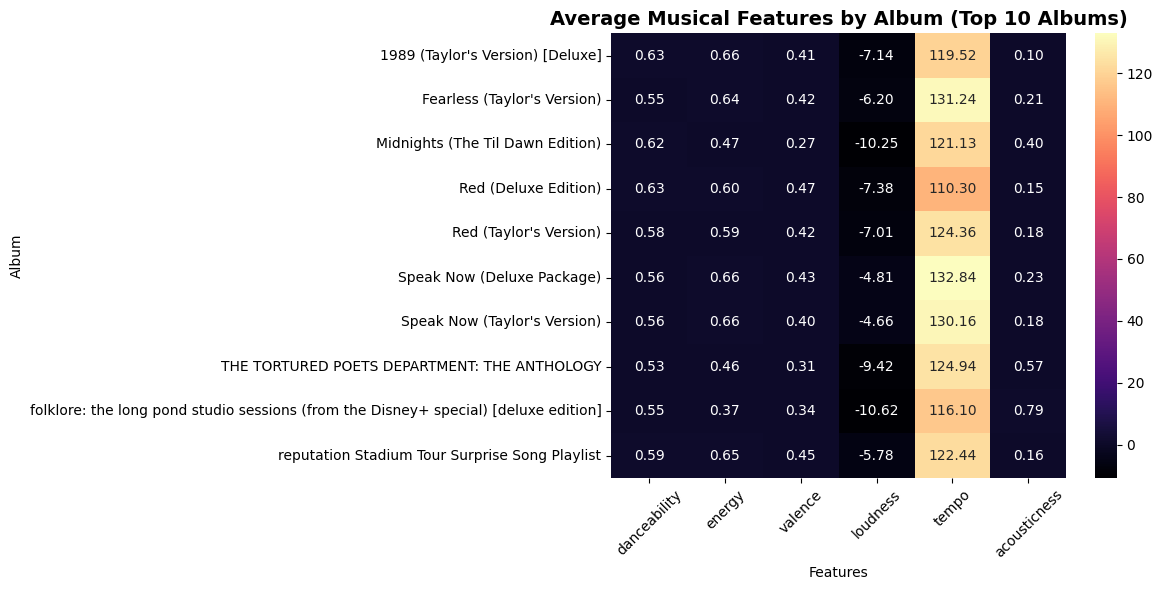

In [14]:
# Select only the top 10 albums (the first 10 albums in the dataset)
top_10_albums = df['album'].value_counts().head(10).index  # Identify the 10 most frequent albums
df_top_10 = df[df['album'].isin(top_10_albums)]

# Average musical characteristics for the first 10 albums
album_means = df_top_10.groupby('album')[['danceability', 'energy', 'valence', 'loudness', 'tempo', 'acousticness']].mean()

print("Average musical characteristics for the 10 albums :")
print(album_means)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(album_means, annot=True, fmt=".2f", cmap="magma")
plt.title("Average Musical Features by Album (Top 10 Albums)", fontsize=14, fontweight='bold')
plt.xlabel("Features")
plt.ylabel("Album")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



***We observe clear differences in average tempo across Taylor Swift’s top 10 albums.
For instance, "Fearless (Taylor's Version)" and "Speak Now (Deluxe Package)" stand out with higher BPM values, while albums like "Midnights" and "Folklore (Disney+ Session)" are noticeably slower.
This variation motivates a deeper exploration of tempo and how it shapes the mood and energy of her songs.***

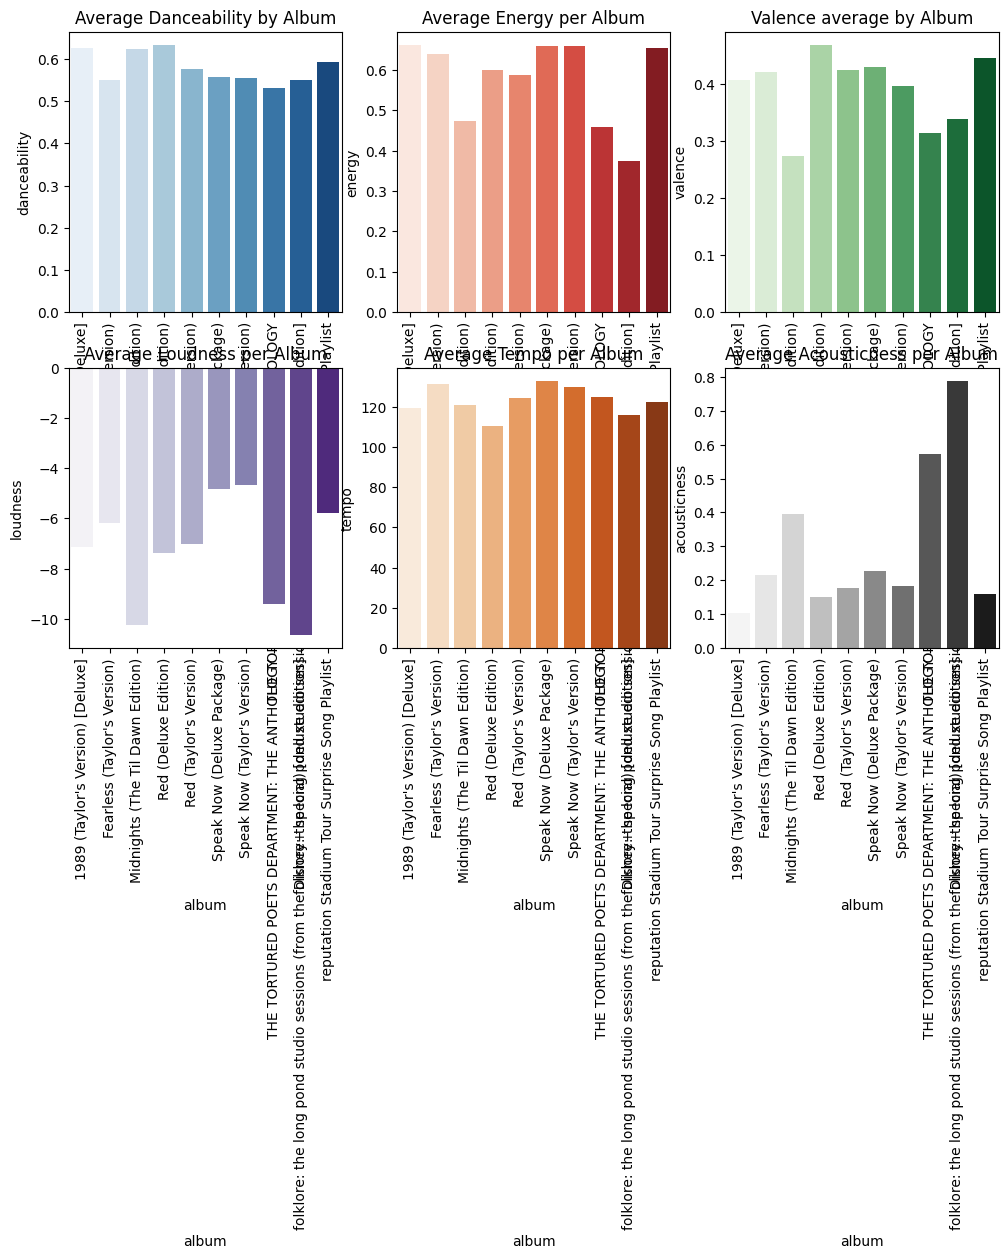

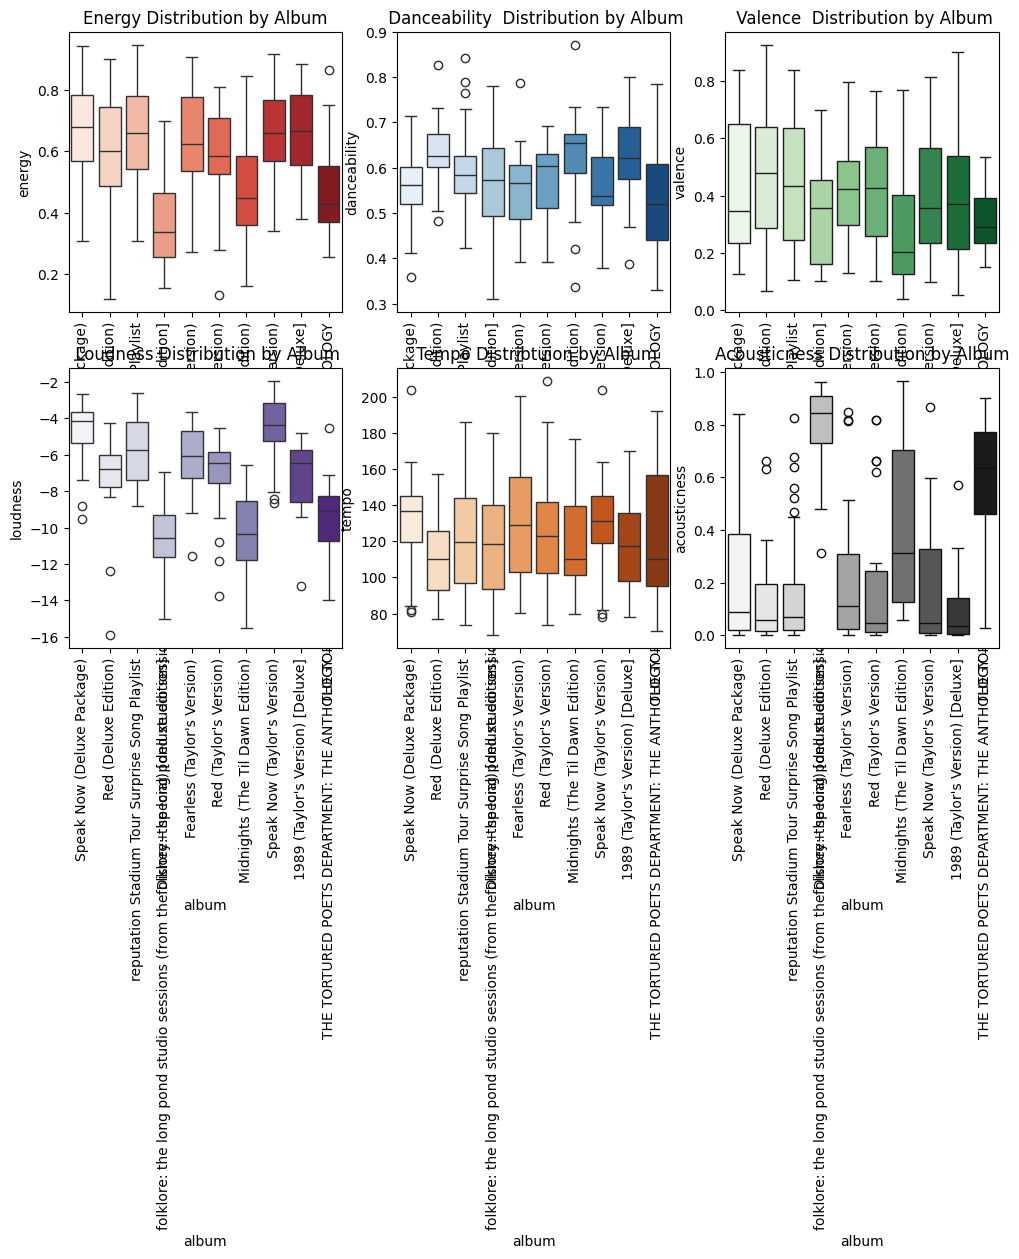

In [15]:
# View the feature averages for the 10 albums
plt.figure(figsize=(12, 8))

# Danceability by album
plt.subplot(2, 3, 1)
sns.barplot(x=album_means.index, y=album_means['danceability'], hue=album_means.index, palette='Blues')
plt.title('Average Danceability by Album')
plt.xticks(rotation=90)

# Energy by album
plt.subplot(2, 3, 2)
sns.barplot(x=album_means.index, y=album_means['energy'], hue=album_means.index, palette='Reds')
plt.title('Average Energy per Album')
plt.xticks(rotation=90)

# Valence by album
plt.subplot(2, 3, 3)
sns.barplot(x=album_means.index, y=album_means['valence'], hue=album_means.index, palette='Greens')
plt.title('Valence average by Album')
plt.xticks(rotation=90)

# Loudness by album
plt.subplot(2, 3, 4)
sns.barplot(x=album_means.index, y=album_means['loudness'], hue=album_means.index, palette='Purples')
plt.title('Average Loudness per Album')
plt.xticks(rotation=90)

# Tempo by album
plt.subplot(2, 3, 5)
sns.barplot(x=album_means.index, y=album_means['tempo'], hue=album_means.index, palette='Oranges')
plt.title('Average Tempo per Album')
plt.xticks(rotation=90)

# Acousticness by album
plt.subplot(2, 3, 6)
sns.barplot(x=album_means.index, y=album_means['acousticness'], hue=album_means.index, palette='Greys')
plt.title('Average Acousticness per Album')
plt.xticks(rotation=90)

# plt.tight_layout()
plt.show()

# Box plots to compare the distribution of features across albums
plt.figure(figsize=(12, 8))

# Energy by album
plt.subplot(2, 3, 1)
sns.boxplot(x='album', y='energy', data=df_top_10, hue='album', palette='Reds')
plt.title('Energy Distribution by Album')
plt.xticks(rotation=90)

# Danceability by album
plt.subplot(2, 3, 2)
sns.boxplot(x='album', y='danceability', data=df_top_10, hue='album', palette='Blues')
plt.title(' Danceability  Distribution by Album')
plt.xticks(rotation=90)

# Valence by album
plt.subplot(2, 3, 3)
sns.boxplot(x='album', y='valence', data=df_top_10, hue='album', palette='Greens')
plt.title(' Valence  Distribution by Album')
plt.xticks(rotation=90)

# Loudness by album
plt.subplot(2, 3, 4)
sns.boxplot(x='album', y='loudness', data=df_top_10, hue='album', palette='Purples')
plt.title(' Loudness Distribution by Album')
plt.xticks(rotation=90)

# Tempo by album
plt.subplot(2, 3, 5)
sns.boxplot(x='album', y='tempo', data=df_top_10, hue='album', palette='Oranges')
plt.title(' Tempo Distribtuion by Album')
plt.xticks(rotation=90)

# Acousticness by album
plt.subplot(2, 3, 6)
sns.boxplot(x='album', y='acousticness', data=df_top_10, hue='album', palette='Greys')
plt.title('Acousticness Distribution by Album')
plt.xticks(rotation=90)

# plt.tight_layout()
plt.show()

- ***Among the six audio features analyzed, tempo shows the most noticeable differences across albums.***
- ***Acousticness: folklore (Disney+) clearly stands out with very high acousticness, confirming its more intimate and stripped-down production.
This also contributes to its lower loudness and energy.***
- ***Danceability and Energy: Albums like 1989 (Taylor’s Version) and Midnights are more danceable and energetic, aligning with their pop-oriented styles.
In contrast, The Tortured Poets Department and folklore (Disney+ special) lean toward slower, more acoustic vibes.***
- ***Loudness: Albums like Reputation Tour Playlist are louder, indicating more intense, possibly performance-oriented production.***
- ***Valence: Albums such as Red (Taylor’s Version) and Speak Now (Deluxe) display higher valence, suggesting a more cheerful or uplifting mood.
Meanwhile, The Anthology and folklore stand out as more emotionally subdued.***

**Tempo**

*Since tempo shows strong variation across albums and plays a key role in defining album identity, we decided to explore its evolution and relationship with other musical attributes in more depth*

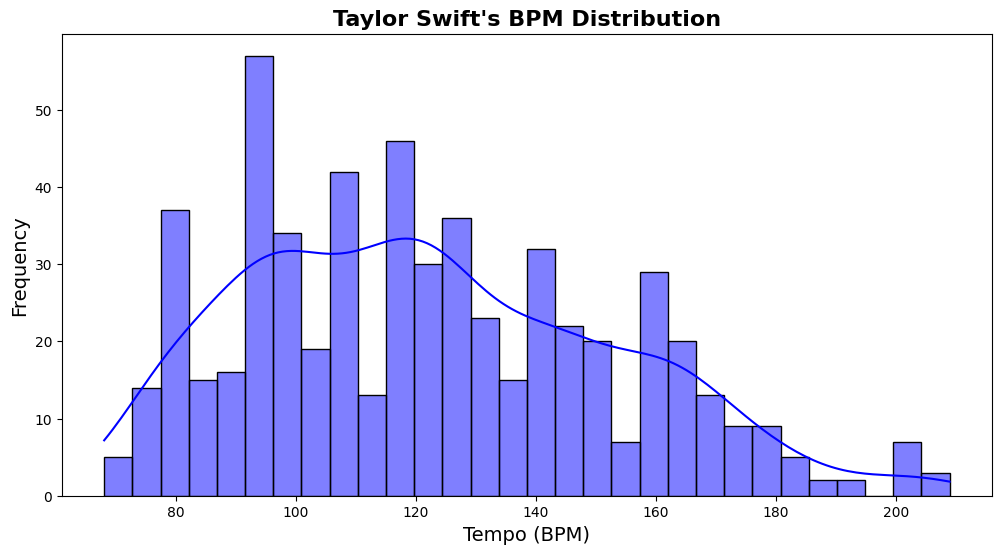

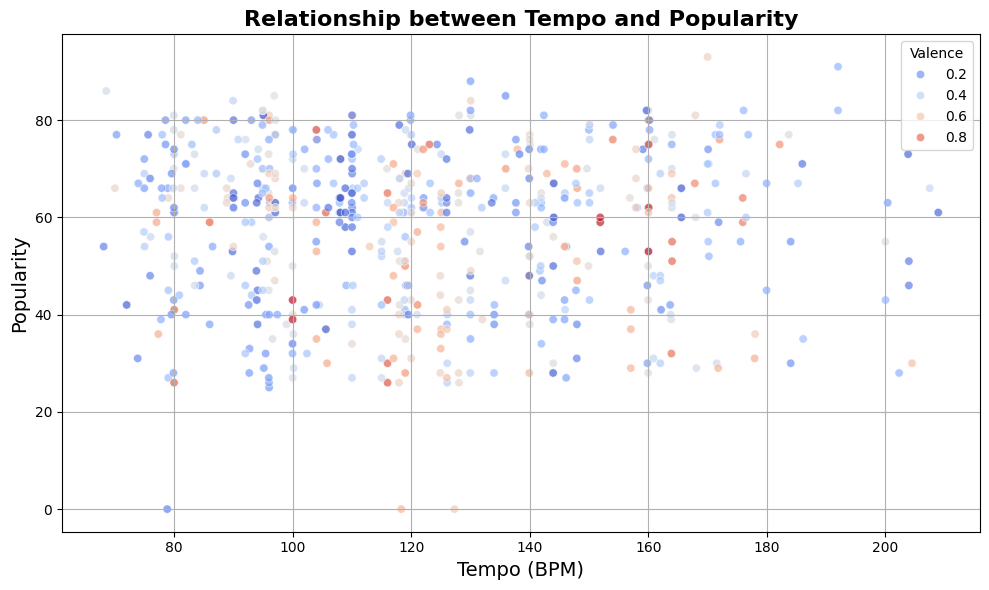

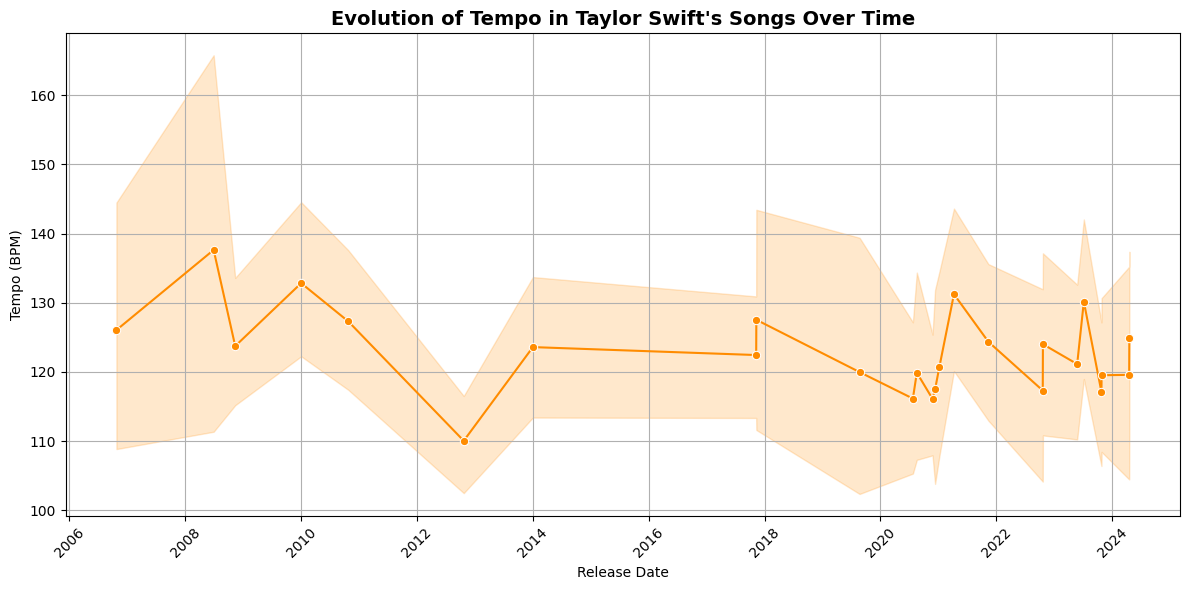

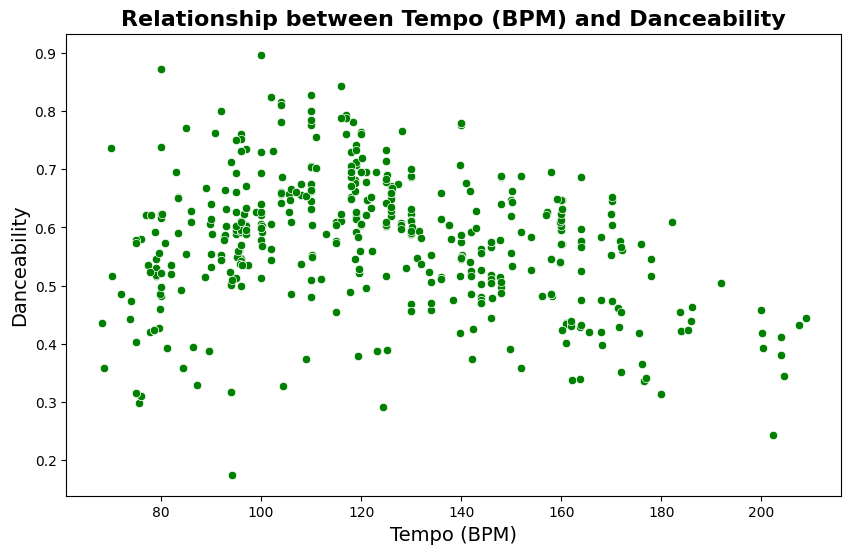


Fast vs. slow songs : 


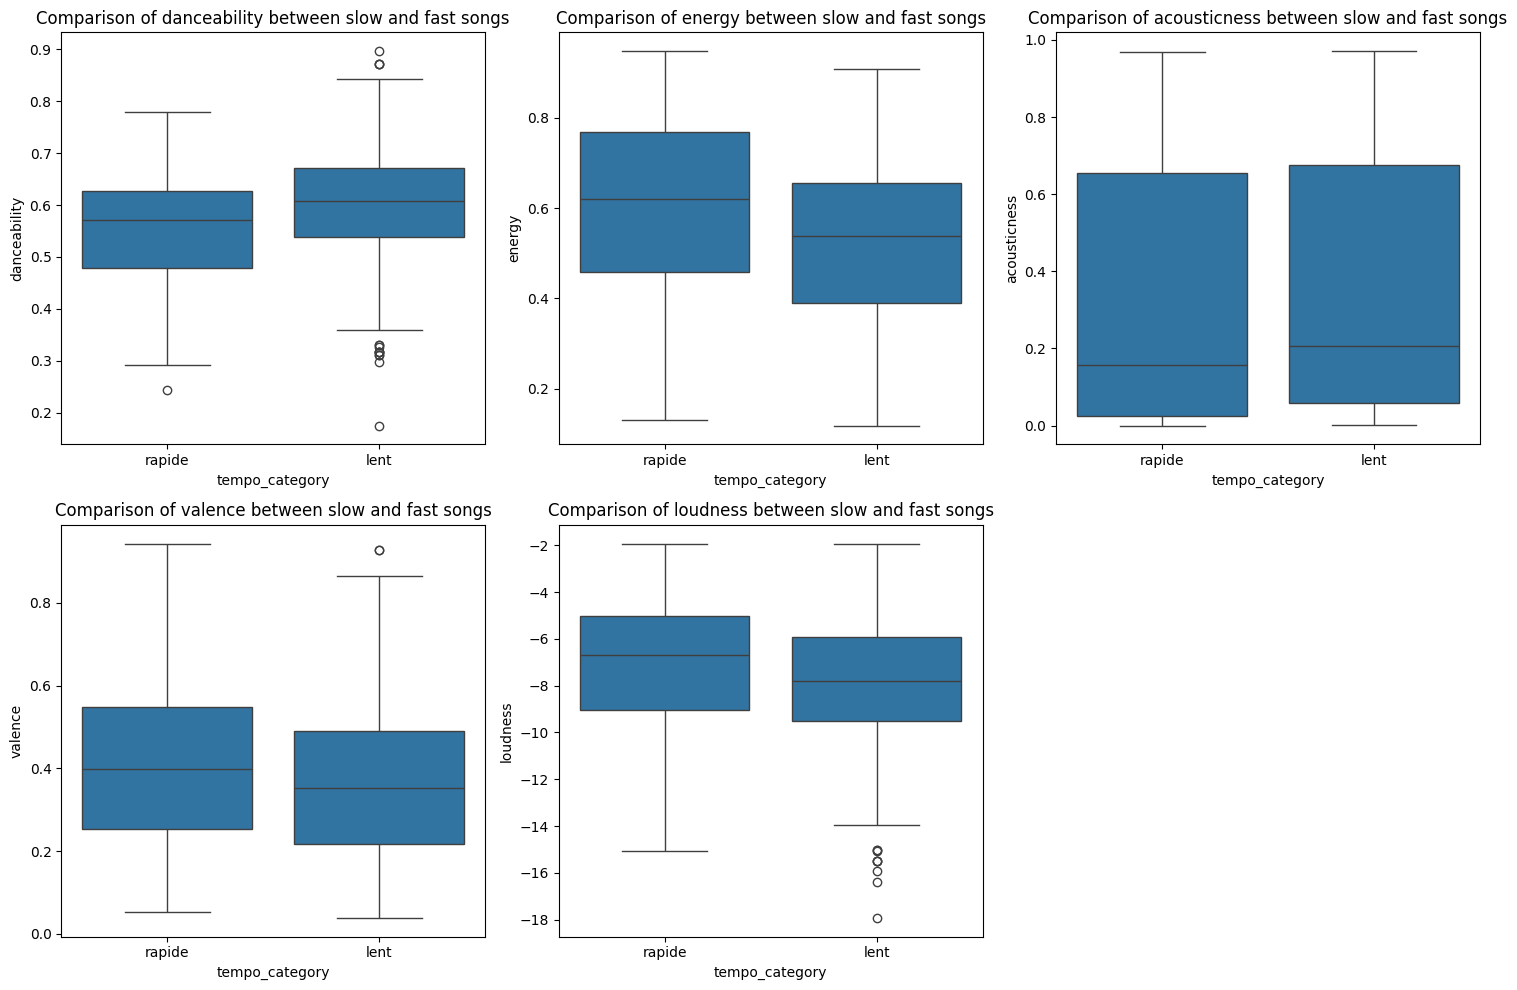

In [16]:
# Exploring Tempo Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['tempo'], bins=30, kde=True, color='blue')
plt.title("Taylor Swift's BPM Distribution", fontsize=16, fontweight='bold')
plt.xlabel('Tempo (BPM)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Popularity vs Tempo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempo', y='popularity', hue='valence', palette='coolwarm', alpha=0.7)
plt.title("Relationship between Tempo and Popularity", fontsize=16, fontweight='bold')
plt.xlabel("Tempo (BPM)", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.legend(title='Valence')
plt.grid(True)
plt.tight_layout()
plt.show()

# Evolution of Tempo over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_date', y='tempo', marker='o', color='darkorange')
plt.title("Evolution of Tempo in Taylor Swift's Songs Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Release Date")
plt.ylabel("Tempo (BPM)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Exploring the relationship between Tempo and danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='danceability', data=df, color='green')
plt.title('Relationship between Tempo (BPM) and Danceability', fontsize=16, fontweight='bold')
plt.xlabel('Tempo (BPM)', fontsize=14)
plt.ylabel('Danceability', fontsize=14)
plt.show()

# Analysis of the characteristics of slow and fast songs
# A fast song is defined as having a tempo > median and a slow song as < median
tempo_median = df['tempo'].median()
df['tempo_category'] = ['rapide' if x > tempo_median else 'lent' for x in df['tempo']]

# Comparison of musical characteristics for fast and slow songs
features = ['danceability', 'energy', 'acousticness', 'valence', 'loudness']

print("\nFast vs. slow songs : ")
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='tempo_category', y=feature, data=df)
    plt.title(f'Comparison of {feature} between slow and fast songs')

plt.tight_layout()
plt.show()

- ***Most of Taylor Swift's songs fall between 90 and 130 BPM, indicating a preference for mid-tempo tracks.***
- ***There’s no strong correlation between tempo and popularity. Popular songs are scattered across different BPMs, though more vibrant (high valence) songs tend to cluster around mid-tempo values.***
- ***Over time, Taylor Swift’s music shows a slight decrease in tempo, especially after 2017, suggesting a shift toward calmer, slower-paced compositions in recent years.***
- ***There is a slight negative correlation between tempo and danceability, meaning faster songs tend to be a bit less danceable, possibly due to increased complexity or intensity.***
- ***Compared to fast songs, slow songs tend to be More danceable, Slightly more acoustic, Less energetic, Less loud and Slightly lower in valence (i.e., less “happy” sounding)***

**Acousticness**

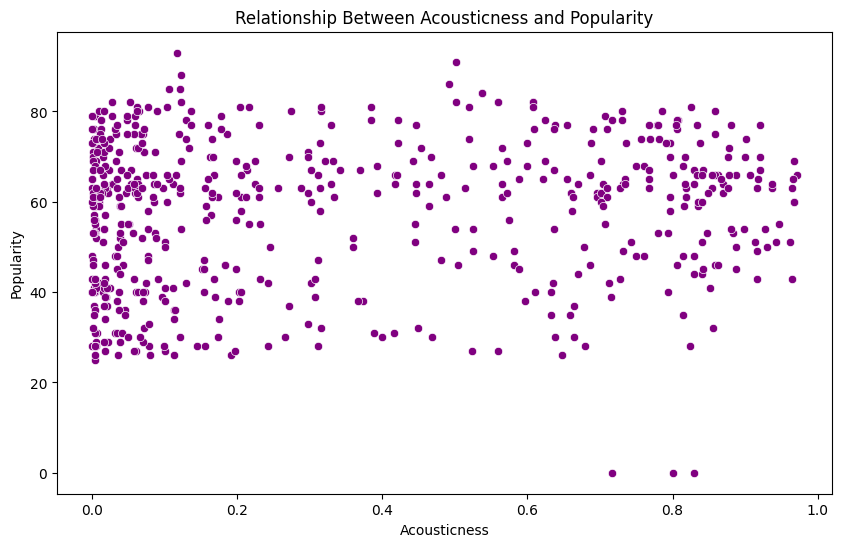

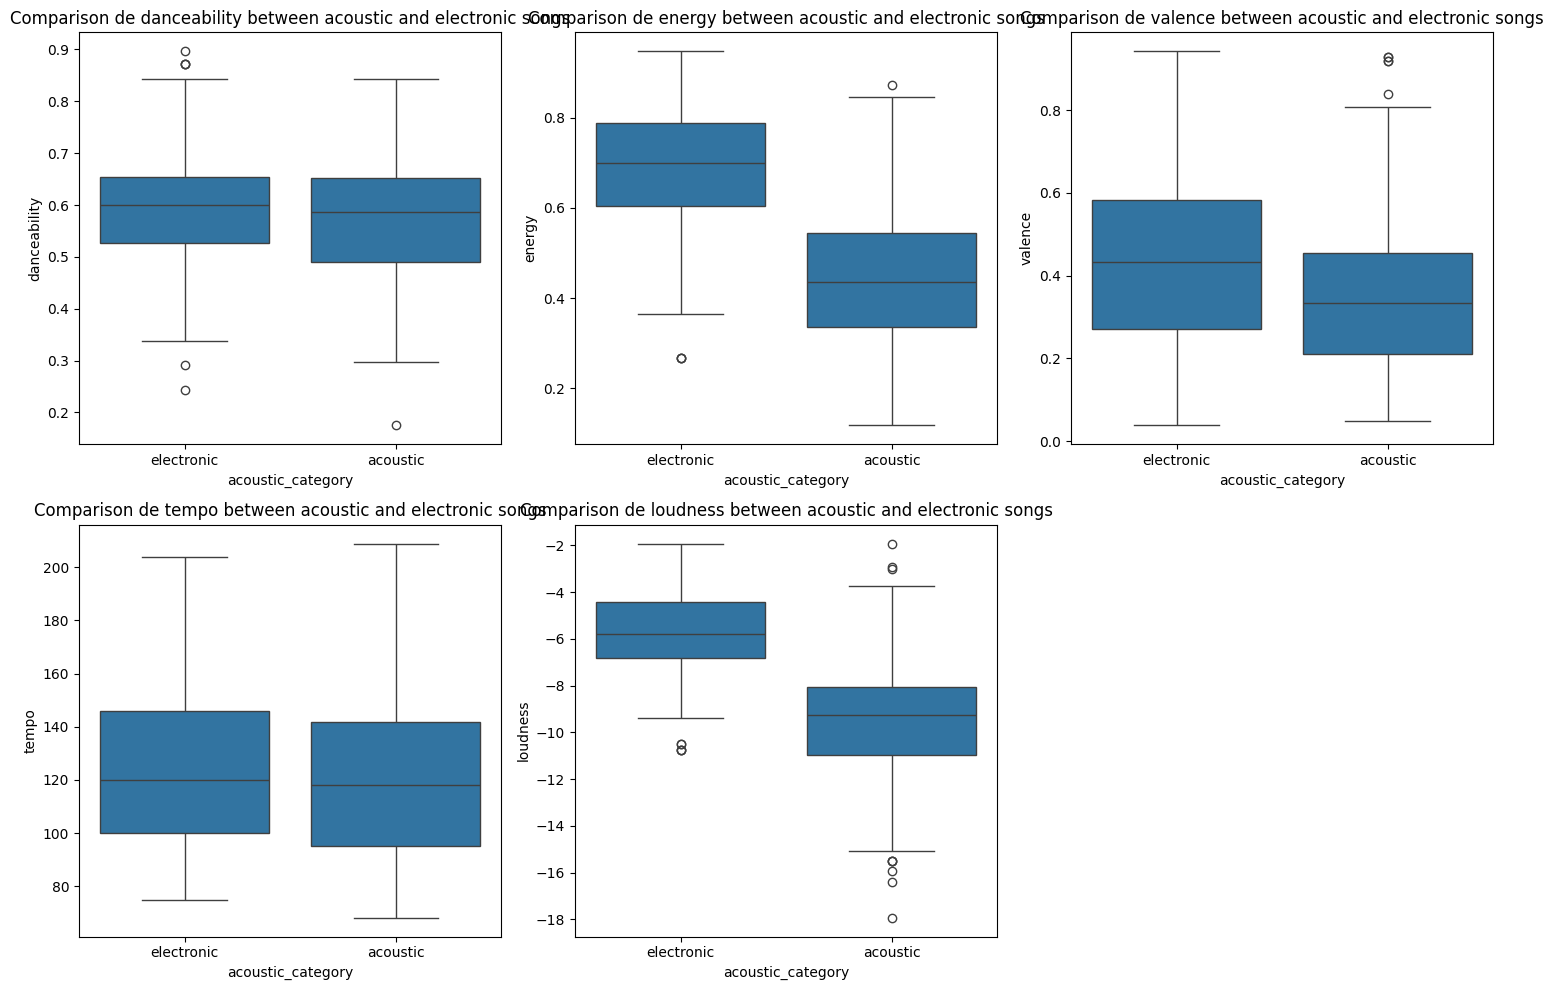


Average popularity for acoustic vs. electronic songs :
acoustic_category
acoustic      59.353952
electronic    56.360825
Name: popularity, dtype: float64


In [17]:
# Exploring the Relationship Between Acousticness and Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness', y='popularity', data=df, color='purple')
plt.title('Relationship Between Acousticness and Popularity')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.show()

# Comparison of musical characteristics of acoustic vs. electronic songs
# Define a song as "acoustic" if its Acousticness is above the median
acousticness_median = df['acousticness'].median()
df['acoustic_category'] = ['acoustic' if x > acousticness_median else 'electronic' for x in df['acousticness']]

# Visualizing the differences between acoustic and electronic songs
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='acoustic_category', y=feature, data=df)
    plt.title(f'Comparison de {feature} between acoustic and electronic songs')

plt.tight_layout()
plt.show()

# Comparison of popularity averages for acoustic vs. electronic songs
mean_popularity = df.groupby('acoustic_category')['popularity'].mean()
print("\nAverage popularity for acoustic vs. electronic songs :")
print(mean_popularity)

- ***Acoustic songs have a slightly higher average popularity (59.4) compared to electronic ones (56.4), but the difference is marginal. Popularity doesn't appear to be strongly influenced by acousticness.***
- ***Electronic songs tend to be: more energetic, louder, faster and have higher valence (more positive/musical mood). Acoustic songs, in contrast, tend to be: softer, less energetic and slightly more neutral in mood.***
- ***The scatterplot between acousticness and popularity shows no strong linear trend, reinforcing the idea that both highly acoustic and highly electronic songs can be popular.***

# **Machine Learning**

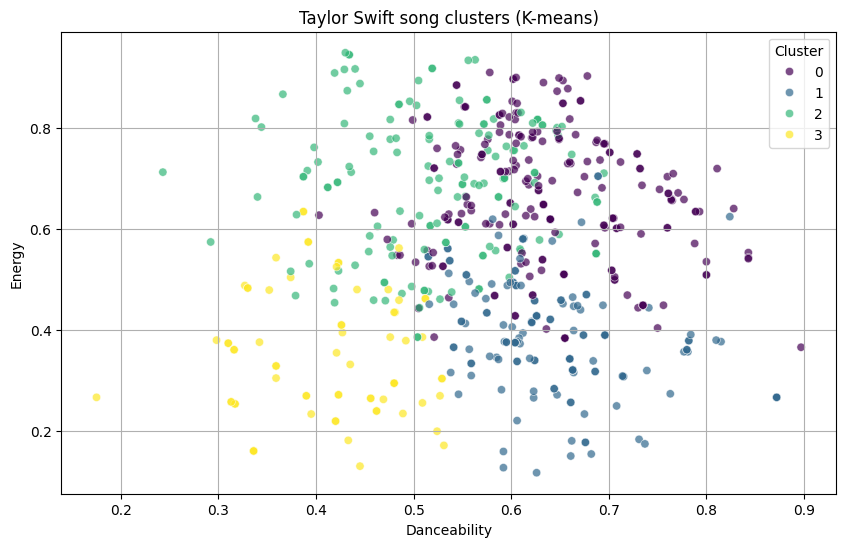

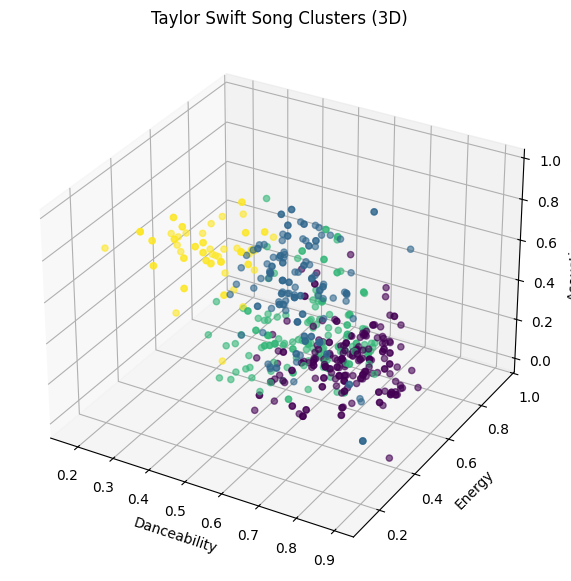


Examples of songs by cluster :

Cluster 0:
                          name                          album  danceability  \
568            Picture To Burn  Taylor Swift (Deluxe Edition)         0.658   
570      A Place in this World  Taylor Swift (Deluxe Edition)         0.576   
572                The Outside  Taylor Swift (Deluxe Edition)         0.589   
574             Stay Beautiful  Taylor Swift (Deluxe Edition)         0.594   
576  Mary's Song (Oh My My My)  Taylor Swift (Deluxe Edition)         0.403   

     energy  acousticness    tempo  
568   0.877       0.17300  105.586  
570   0.777       0.05100  115.028  
572   0.805       0.00491  112.982  
574   0.629       0.08680  131.597  
576   0.627       0.01770   74.900  

Cluster 1:
                                                  name  \
567                                         Tim McGraw   
569        Teardrops On My Guitar - Radio Single Remix   
579                                          Invisible   
559  Love Story

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D



#  Selection of variables for clustering
features = ['danceability', 'energy', 'acousticness', 'tempo']
df_cluster = df[features].dropna()

#  Data normalization (important for K-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Apply K-means with 4 clusters (adjust if necessary)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(df_scaled)

# Visualization of clusters (2D: danceability vs energy)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='danceability', y='energy', hue='cluster', palette='viridis', alpha=0.7)
plt.title("Taylor Swift song clusters (K-means)")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

#  3D visualization (danceability vs energy & acousticness)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster['danceability'], df_cluster['energy'], df_cluster['acousticness'], c=df_cluster['cluster'], cmap='viridis', alpha=0.6)
ax.set_xlabel("Danceability")
ax.set_ylabel("Energy")
ax.set_zlabel("Acousticness")
ax.set_title("Taylor Swift Song Clusters (3D)")
plt.show()

# Show some songs by cluster
df['cluster'] = df_cluster['cluster']
print("\nExamples of songs by cluster :")
for i in range(4):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i][['name', 'album', 'danceability', 'energy', 'acousticness', 'tempo']].head(5))


***With a cluster number k=4, the differentiation between the 4 song groups is not very obvious. There’s a visible separation between some groups, but boundaries are not sharp.***


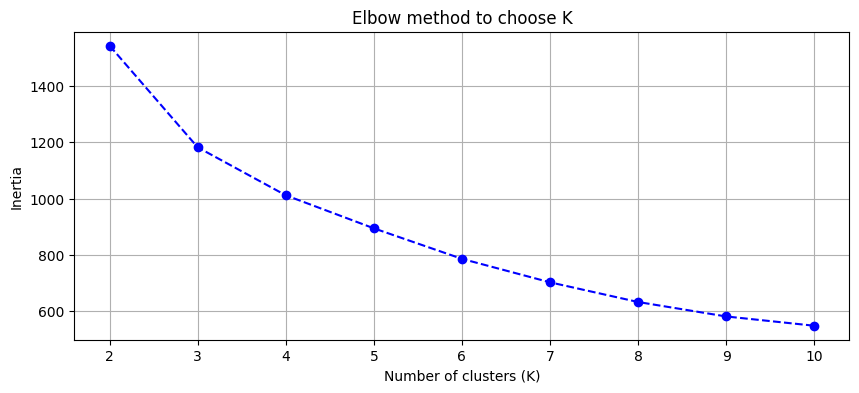

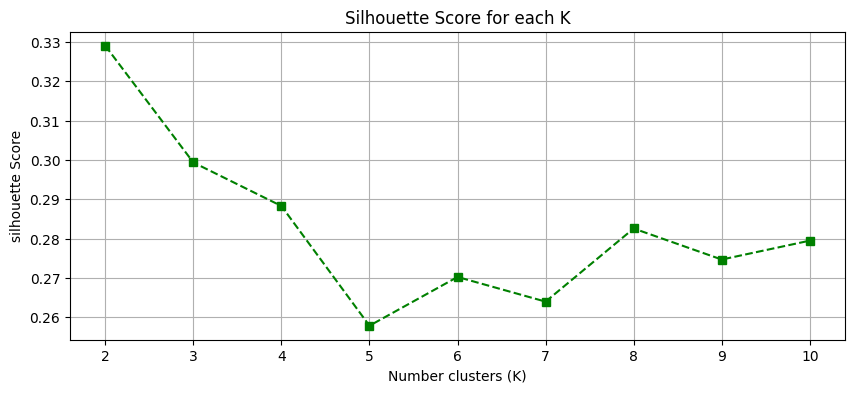

Best number of clusters according to silhouette score : 2


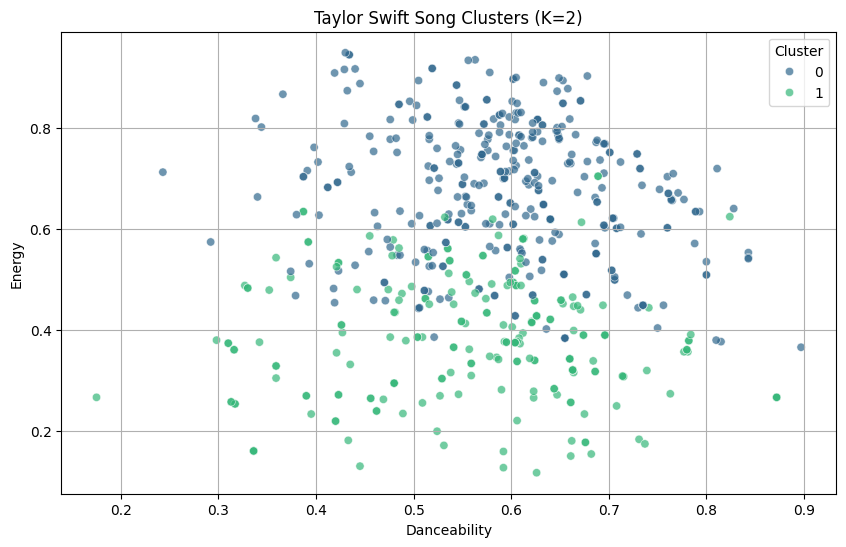

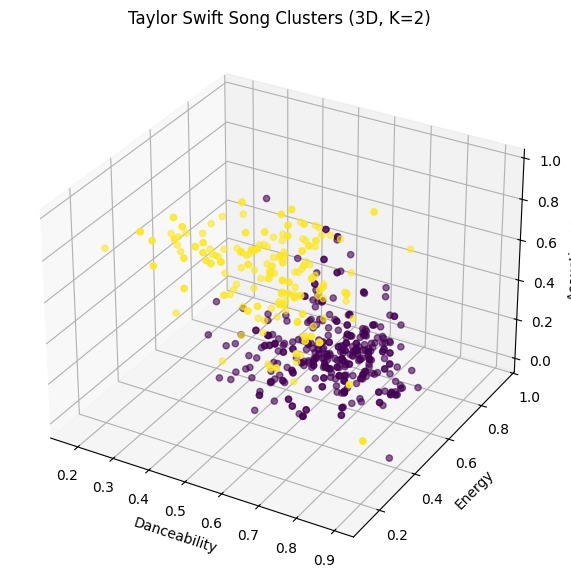


Examples of songs by cluster :

Cluster 0:
                                     name                          album  \
581  Teardrops on My Guitar - Pop Version  Taylor Swift (Deluxe Edition)   
568                       Picture To Burn  Taylor Swift (Deluxe Edition)   
570                 A Place in this World  Taylor Swift (Deluxe Edition)   
571                           Cold As You  Taylor Swift (Deluxe Edition)   
572                           The Outside  Taylor Swift (Deluxe Edition)   

     danceability  energy  acousticness    tempo  
581         0.459   0.753       0.04020  199.997  
568         0.658   0.877       0.17300  105.586  
570         0.576   0.777       0.05100  115.028  
571         0.418   0.482       0.21700  175.558  
572         0.589   0.805       0.00491  112.982  

Cluster 1:
                                                  name  \
567                                         Tim McGraw   
569        Teardrops On My Guitar - Radio Single Remix   
579    

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#  Finding the Right Number of Clusters with the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Test K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)  # Inertia
    silhouette_scores.append(silhouette_score(df_scaled, labels))  #silhouette score

# Show elbow curve
plt.figure(figsize=(10, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow method to choose K")
plt.grid(True)
plt.show()

# Show silhouette score for each K
plt.figure(figsize=(10, 4))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='g')
plt.xlabel("Number clusters (K)")
plt.ylabel("silhouette Score")
plt.title("Silhouette Score for each K")
plt.grid(True)
plt.show()

#  Select the best K based on scores
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best number of clusters according to silhouette score : {best_k}")

#  Apply K-means with the best K found
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(df_scaled)

#  Visualization of clusters (2D: danceability vs energy)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='danceability', y='energy', hue='cluster', palette='viridis', alpha=0.7)
plt.title(f"Taylor Swift Song Clusters (K={best_k})")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

#  3D visualization (optional)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster['danceability'], df_cluster['energy'], df_cluster['acousticness'], c=df_cluster['cluster'], cmap='viridis', alpha=0.6)
ax.set_xlabel("Danceability")
ax.set_ylabel("Energy")
ax.set_zlabel("Acousticness")
ax.set_title(f"Taylor Swift Song Clusters (3D, K={best_k})")
plt.show()

# Show some songs by cluster
df['cluster'] = df_cluster['cluster']
print("\nExamples of songs by cluster :")
for i in range(best_k):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i][['name', 'album', 'danceability', 'energy', 'acousticness', 'tempo']].head(5))


***With a cluster number k=2, the differentiation between song groups is better observable.***

***In Cluster 0, we observe higher energy and danceability, with lower acousticness – this group likely includes more upbeat, electronic pop tracks.***

***In Cluster 1, songs tend to be more acoustic and less energetic, likely representing ballads or folk-influenced songs.***

***These clusters may reflect two distinct musical styles in Taylor Swift's discography: energetic/pop versus acoustic/folk.***

Silhouette  Score(2 clusters) : 0.33
Silhouette Score (K=3) : 0.30
Silhouette Score (4 clusters) : 0.29


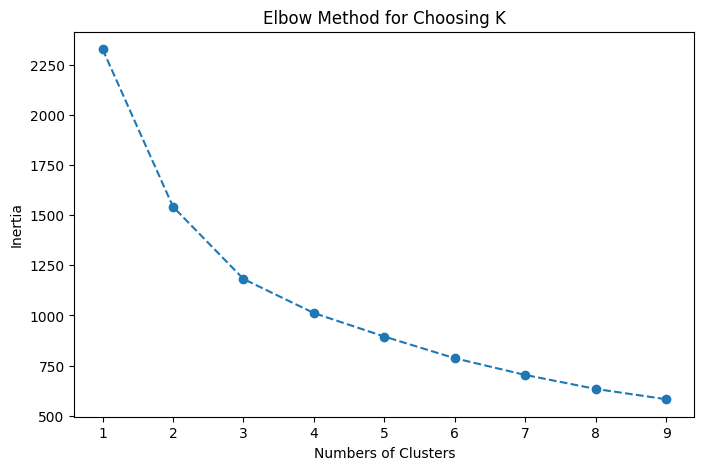

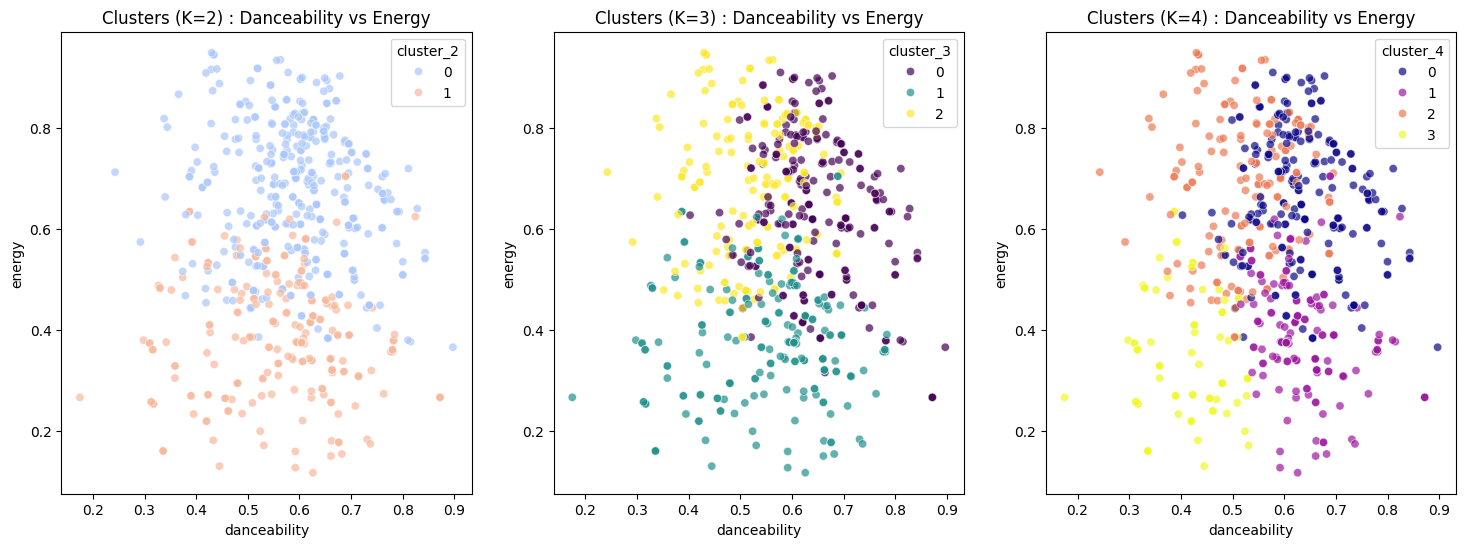

In [20]:
# Apply K-means with 2 and 4 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)

df_cluster['cluster_2'] = kmeans_2.fit_predict(df_scaled)
df_cluster['cluster_3'] = kmeans_3.fit_predict(df_scaled)

df_cluster['cluster_4'] = kmeans_4.fit_predict(df_scaled)

#  Silhouette score to compare cluster cohesion
silhouette_2 = silhouette_score(df_scaled, df_cluster['cluster_2'])
silhouette_3 = silhouette_score(df_scaled, df_cluster['cluster_3'])

silhouette_4 = silhouette_score(df_scaled, df_cluster['cluster_4'])

print(f"Silhouette  Score(2 clusters) : {silhouette_2:.2f}")
print(f"Silhouette Score (K=3) : {silhouette_3:.2f}")

print(f"Silhouette Score (4 clusters) : {silhouette_4:.2f}")


# Elbow method for choosing the right number of clusters
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Numbers of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Choosing K')
plt.show()

#  Visualization of clusters (2D: danceability vs energy)
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.scatterplot(data=df_cluster, x='danceability', y='energy', hue='cluster_2', palette='coolwarm', alpha=0.7, ax=axes[0])
axes[0].set_title("Clusters (K=2) : Danceability vs Energy")

sns.scatterplot(data=df_cluster, x='danceability', y='energy', hue='cluster_3', palette='viridis', alpha=0.7, ax=axes[1])
axes[1].set_title("Clusters (K=3) : Danceability vs Energy")

sns.scatterplot(data=df_cluster, x='danceability', y='energy', hue='cluster_4', palette='plasma', alpha=0.7, ax=axes[2])
axes[2].set_title("Clusters (K=4) : Danceability vs Energy")

plt.show()

***We see that the differentiation of song types is more significant when the song types are separated into 2 groups.***

K=2, Mean Silouhette Score: 0.3277
K=3, Mean Silouhette Score: 0.2953
K=4, Mean Silouhette Score: 0.2798
K=5, Mean Silouhette Score: 0.2525
K=6, Mean Silouhette Score: 0.2511
K=7, Mean Silouhette Score: 0.2377
K=8, Mean Silouhette Score: 0.2500
K=9, Mean Silouhette Score: 0.2427


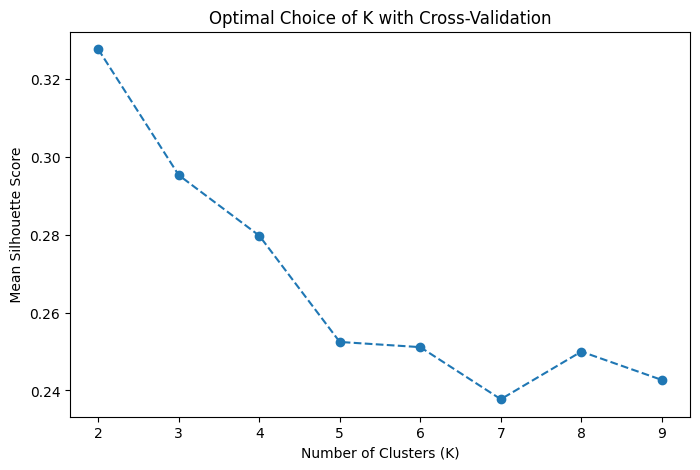


 Best k selected : 2


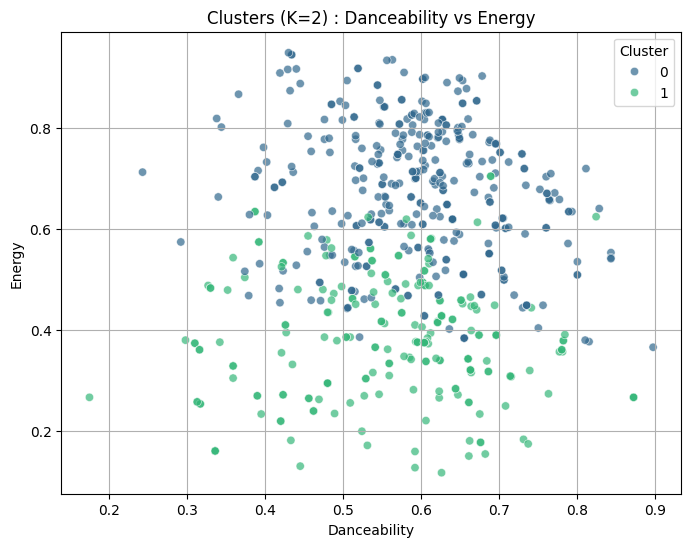

In [21]:
from sklearn.model_selection import KFold


# Defining the range of K to be tested
K_range = range(2, 10)
scores = []

# Cross-validation with Silhouette Score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in K_range:
    silhouette_scores = []

    for train_index, test_index in kf.split(df_scaled):
        X_train, X_test = df_scaled[train_index], df_scaled[test_index]

        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_train)

        cluster_labels = kmeans.predict(X_test)
        silhouette_scores.append(silhouette_score(X_test, cluster_labels))

    mean_silhouette = np.mean(silhouette_scores)
    scores.append(mean_silhouette)
    print(f"K={k}, Mean Silouhette Score: {mean_silhouette:.4f}")

# Visualization of the average silhouette score
plt.figure(figsize=(8,5))
plt.plot(K_range, scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel(' Mean Silhouette Score ')
plt.title('Optimal Choice of K with Cross-Validation')
plt.show()

# Selecting the best K
best_k = K_range[np.argmax(scores)]
print(f"\n Best k selected : {best_k}")

# Apply K-Means with the best K
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_cluster['cluster'] = final_kmeans.fit_predict(df_scaled)

# Visualization of clusters in 2D
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster, x='danceability', y='energy', hue='cluster', palette='viridis', alpha=0.7)
plt.title(f"Clusters (K={best_k}) : Danceability vs Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

***As this graph confirms, we obtain a higher silouhette score and therefore a clear differentiation of the clusters for k=2.***

Evaluation of the linear regression model :
MAE (Mean Absolute Error) : 12.34
MSE (Root mean square error)) : 213.36
R² (Variance explained) : -0.00

Factors influencing the popularity of songs :
        Feature  Coefficient
0  danceability     5.912137
4  acousticness     3.729329
3         tempo     0.004155
1        energy    -2.050080
2       valence    -8.321785


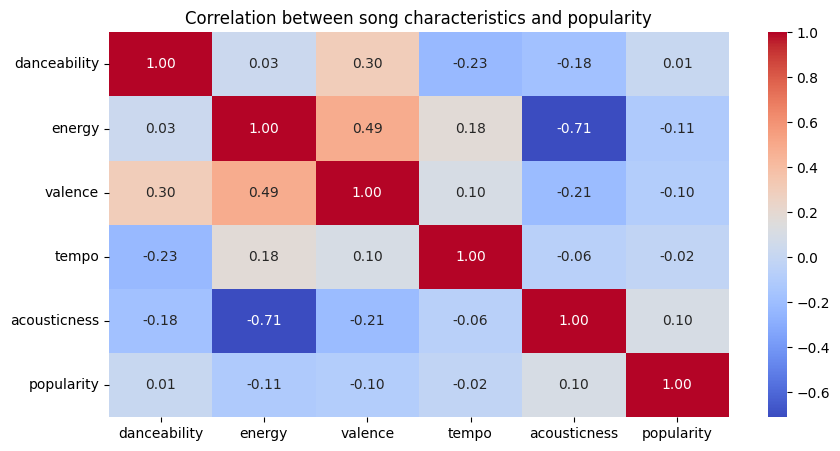

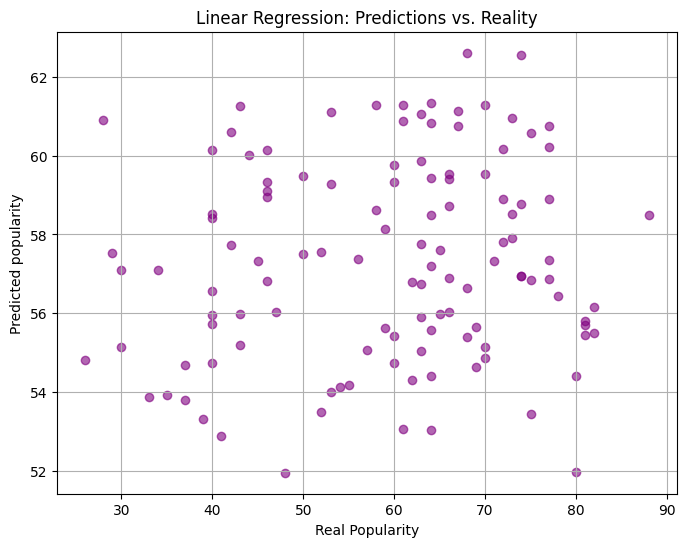

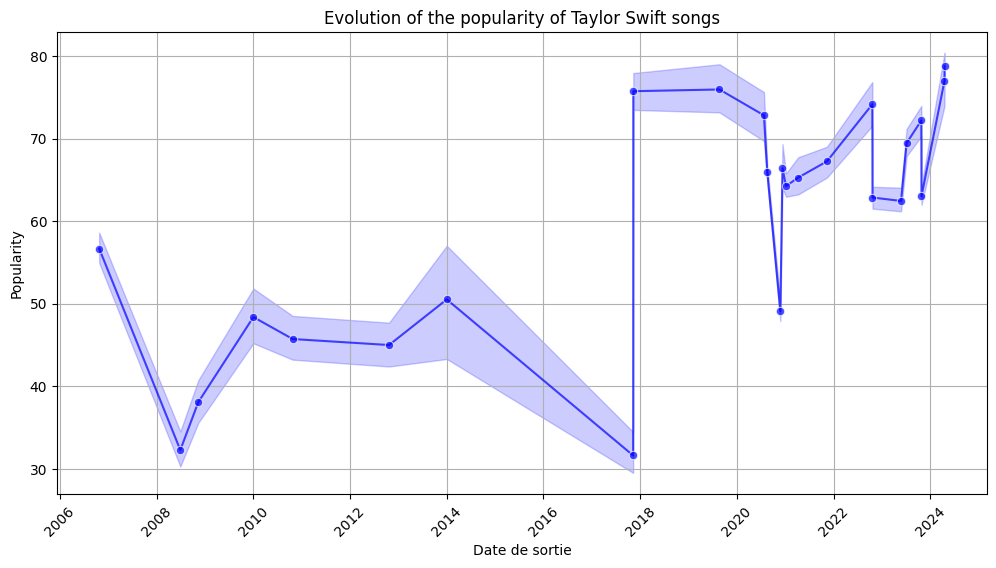

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Selection of explanatory and target variables
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness']
target = 'popularity'

# Delete missing values
df1 = df[features + [target]].dropna()

# Separation into training and testing game
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#  Prédictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation of the linear regression model :")
print(f"MAE (Mean Absolute Error) : {mae:.2f}")
print(f"MSE (Root mean square error)) : {mse:.2f}")
print(f"R² (Variance explained) : {r2:.2f}")

# Importance of variables (model coefficients)
importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
importance = importance.sort_values(by='Coefficient', ascending=False)
print("\nFactors influencing the popularity of songs :")
print(importance)

# Visualizing relationships between features and popularity
plt.figure(figsize=(10, 5))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between song characteristics and popularity")
plt.show()

# Visualizing predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="purple")
plt.xlabel("Real Popularity")
plt.ylabel("Predicted popularity")
plt.title("Linear Regression: Predictions vs. Reality")
plt.grid(True)
plt.show()

# Popularity trends over time
if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'])
    df = df.sort_values(by='release_date')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='release_date', y='popularity', marker='o', color='blue', alpha=0.7)
    plt.title("Evolution of the popularity of Taylor Swift songs")
    plt.xlabel("Date de sortie")
    plt.ylabel("Popularity")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

***The linear regression between the popularity variable as a function of other certain variables does not show any trend, as evidenced by the very low R2 score which is almost zero.***

In [23]:
# One-Hot encoding
df_encoded = pd.get_dummies(df, columns=['album'], drop_first=True)  # Avoid the multicolinearity


In [24]:
features = df[['danceability', 'energy', 'valence', 'tempo', 'acousticness']]
album_columns = [col for col in df_encoded.columns if 'album_' in col]

# # Keep only features and encoded columns from 'album'
df_encoded_clean = df_encoded[album_columns]
# Reset the indexes of both DataFrames to avoid conflicts
features2 = features.reset_index(drop=True)
df_encoded_clean = df_encoded_clean.reset_index(drop=True)

# Concatenate after alignment
X1 = pd.concat([features2, df_encoded_clean], axis=1)
Y1 = df['popularity']

# Verification
print(X1.head())


   danceability  energy  valence    tempo  acousticness  album_1989 (Deluxe)  \
0         0.459   0.753    0.483  199.997       0.04020                False   
1         0.479   0.578    0.192  146.165       0.52500                False   
2         0.612   0.394    0.233   96.001       0.63700                False   
3         0.563   0.934    0.518  143.964       0.00452                False   
4         0.668   0.672    0.539   89.011       0.11100                False   

   album_1989 (Taylor's Version)  album_1989 (Taylor's Version) [Deluxe]  \
0                          False                                   False   
1                          False                                   False   
2                          False                                   False   
3                          False                                   False   
4                          False                                   False   

   album_Fearless (International Version)  album_Fearless (Pla

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X1, Y1)


LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Model with 'album'
Y_pred_with = model.predict(X1)
mse_with = mean_squared_error(Y1, Y_pred_with)
r2_with = r2_score(Y1, Y_pred_with)

# Model without 'album'
X_without_album = X1.drop(columns=[col for col in X1.columns if 'album' in col])
model_without = LinearRegression().fit(X_without_album, Y1)
Y_pred_without = model_without.predict(X_without_album)
mse_without = mean_squared_error(Y1, Y_pred_without)
r2_without = r2_score(Y1, Y_pred_without)

print(f" MSE with 'album' : {mse_with:.4f} | R² : {r2_with:.4f}")
print(f" MSE without 'album' : {mse_without:.4f} | R² : {r2_without:.4f}")

 MSE with 'album' : 46.0649 | R² : 0.8231
 MSE without 'album' : 255.3745 | R² : 0.0195


***Including the album variable in the regression model significantly enhances its explanatory power. The R² score jumps from 0.02 to 0.82, indicating that the album to which a song belongs plays a crucial role in predicting its popularity—much more so than musical features alone such as energy or tempo.***

Evaluation of the Random Forest model :
MAE (Mean Absolute Error) : 11.68
MSE (Mean Squared Error) : 207.85
R² (Variance explained) : 0.27

Factors influencing song popularity (Random Forest) :
        Feature  Importance
5   speechiness    0.243499
1        energy    0.178233
6      liveness    0.135030
4  acousticness    0.129925
2       valence    0.113626
0  danceability    0.112463
3         tempo    0.087224


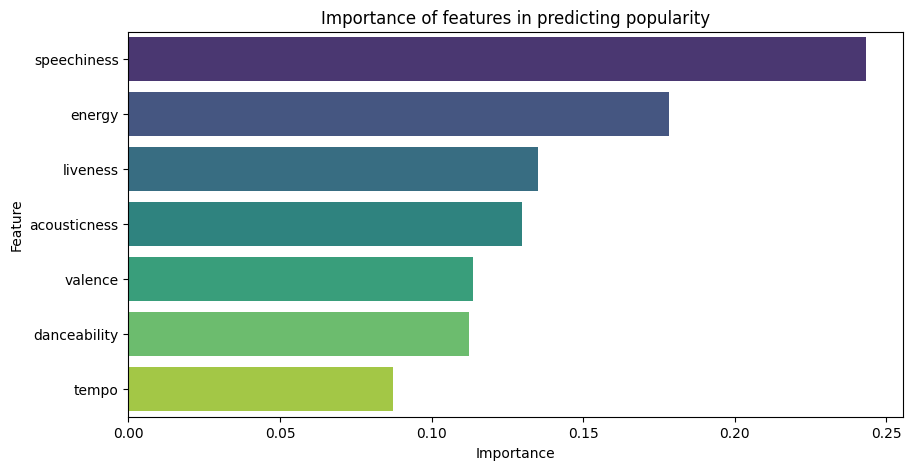

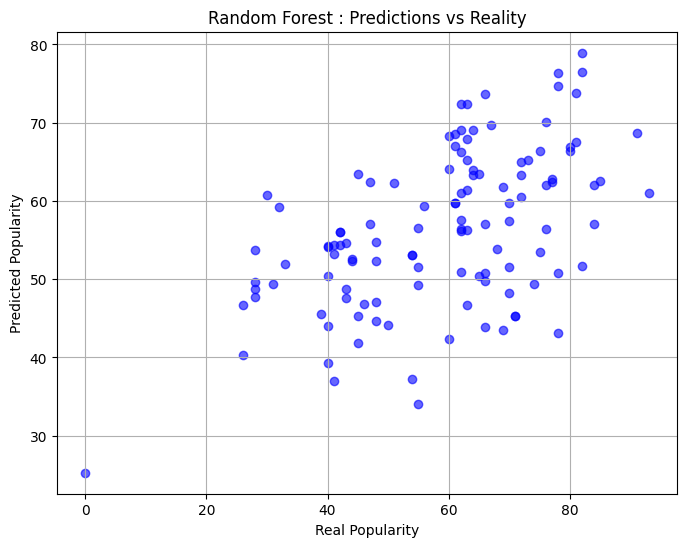

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Selection of explanatory and target variables (with speechiness and liveness in addition)
features3 = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'speechiness', 'liveness']
target = 'popularity'


# Separation into training and test data (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(df[features3], df[target], test_size=0.2, random_state=42)

#   Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation of the Random Forest model :")
print(f"MAE (Mean Absolute Error) : {mae:.2f}")
print(f"MSE (Mean Squared Error) : {mse:.2f}")
print(f"R² (Variance explained) : {r2:.2f}")

# Variables Importance
importance = pd.DataFrame({'Feature': features3, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
print("\nFactors influencing song popularity (Random Forest) :")
print(importance)

#  Visualizing feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance['Importance'], y=importance['Feature'], hue=importance['Feature'], palette="viridis")
plt.title("Importance of features in predicting popularity")
plt.show()

# Graph of predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Real Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Random Forest : Predictions vs Reality")
plt.grid(True)
plt.show()

***Without including the album variable for the linear regression analysis, we observe that the Random Forest model is a more efficient model in predicting the popularity variable with an R2 score of 0.27.***

***Among the most influential features in determining popularity, speechiness and energy emerge as the most significant, suggesting that lyrical content and intensity play key roles in a song’s success.***

 XGBoost Model Evaluation:
MAE (Mean Absolute Error) : 11.32
RMSE (Mean Squared Error) : 14.31
R² (Performance Score) : 0.28


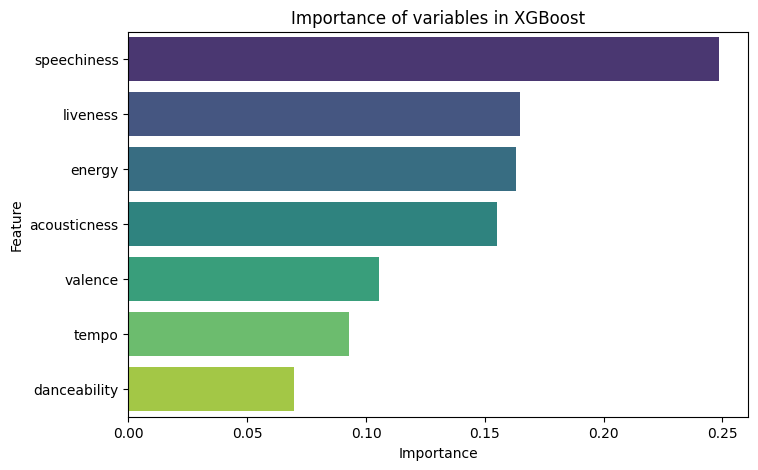

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Selection of explanatory and target variables
features4 = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'speechiness', 'liveness']
target = 'popularity'


#  Normalization of explanatory variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features4])

#  Separation of data into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df[target], test_size=0.2, random_state=42)

#  Training the XGBoost Regressor Model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

#  Predictions on test data
y_pred = xgb.predict(X_test)

#  Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" XGBoost Model Evaluation:")
print(f"MAE (Mean Absolute Error) : {mae:.2f}")
print(f"RMSE (Mean Squared Error) : {rmse:.2f}")
print(f"R² (Performance Score) : {r2:.2f}")

# Features Importance
feature_importance = pd.DataFrame({'Feature': features4, 'Importance': xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', palette='viridis')
plt.title("Importance of variables in XGBoost")
plt.show()

***The same goes for the XGBoost method, the model is quite efficient compared to the linear regression model and displays an R2 score almost identical to the random forest model. And in this model too, the most important variables to explain the level of popularity are speechiness and energy.***

***However, the difference in importance between these two variables is more pronounced in the XGBoost model, making speechiness stand out even more as a key factor.***



# **Conclusion**

Through this comprehensive analysis of Taylor Swift’s discography, we uncover rich musical diversity and evolving artistic trends. Temporal patterns reveal key moments of artistic reinvention, with **2017–2018** marking a popularity spike *(Reputation)* and a notable **shift toward softer, introspective styles during the 2020 pandemic era** *(Folklore, Evermore)*. The popularity resurges with recent re-recordings and new releases.

Musically, we observe clear contrasts between albums: **upbeat, pop-driven eras** *(1989, Midnights)* are characterized by higher tempo, loudness, and danceability, whereas **acoustic albums** *(Folklore [Disney+], The Anthology)* lean toward softer, more emotional compositions.

Tempo plays a subtle role: most songs sit in the **mid-tempo** range, with slower tracks tending to be more danceable and acoustic. However, neither tempo nor acousticness alone strongly predict popularity.

Clustering techniques reveal **two** main song styles: **high-energy electronic/pop tracks and calmer acoustic/folk songs**, with K=2 providing the clearest segmentation—highlighting the duality in Swift’s musical identity.

From a modeling perspective, simple linear regression fails to capture the drivers of popularity. However, **including the album variable** drastically boosts predictive power, confirming the centrality of album context in determining success. When album is excluded, Random Forest and XGBoost models perform better (R² ≈ 0.20–0.27), emphasizing the importance of **speechiness and energy** in popularity prediction. Notably, XGBoost highlights **speechiness** as the dominant feature, suggesting that lyrical density and vocal delivery may play a crucial role in engaging listeners.

**Overall, this analysis sheds light on the stylistic, structural, and contextual factors that shape Taylor Swift’s musical success, offering a multidimensional view of her evolution as an artist.**